<div style="display: flex; text-align:center; background-color: RGB(136,202,252);border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em">PROJET 9 - Produisez une étude de marché avec R ou Python - KMEANS , CAH
    
</h1>
</div>

<div style="border-style: double;border-width: 5px;border-color: RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182);margin-left: 4.5em; text-indent: -4.5em"><a id="200">SOMMAIRE</a> </h3>
    
  - 1. **[CLUSTERING](#3)**
     - 1. [KMEANS](#31)
     - 2. [CAH](#32)
        
    </div>


<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em">0.0 - Importation des librairies et declaration de fonctions</h3>
</div>

In [1]:
%pylab inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_row',100)


from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,centroid
import scipy.stats as stats



Populating the interactive namespace from numpy and matplotlib


<div style="background-color: RGB(136,202,252);" >
<h2 style="margin: auto; padding: 20px;margin-left: 4.5em; text-indent: -4.5em">3 - CLUSTERING</h2>
</div>

In [2]:
data = pd.read_csv('Donnees/data.csv')
data.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
0,Afghanistan,357.31,728905.0,68985.0,21.76,8.015197,530.149831,-2.80
1,Afrique du Sud,556.42,1090255.0,160600.0,45.54,4.344302,6723.928582,-0.28
2,Albanie,1260.49,1241000.0,383980.0,54.23,-0.268914,4521.752217,0.38
3,Algérie,798.71,1220925.0,155855.0,31.18,6.293751,4134.936055,-0.92
4,Allemagne,943.24,1299035.0,401135.0,66.54,1.634734,44670.222282,0.59


In [3]:
 # Sélectionner uniquement les colonnes numériques
data_numeric = data.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)

# ACP
pca = PCA()
data_pca = pca.fit_transform(data_normalized)

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="31">KMEANS</a></h3>
</div>

In [4]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(data_normalized)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(data_normalized, kmeanModel.labels_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

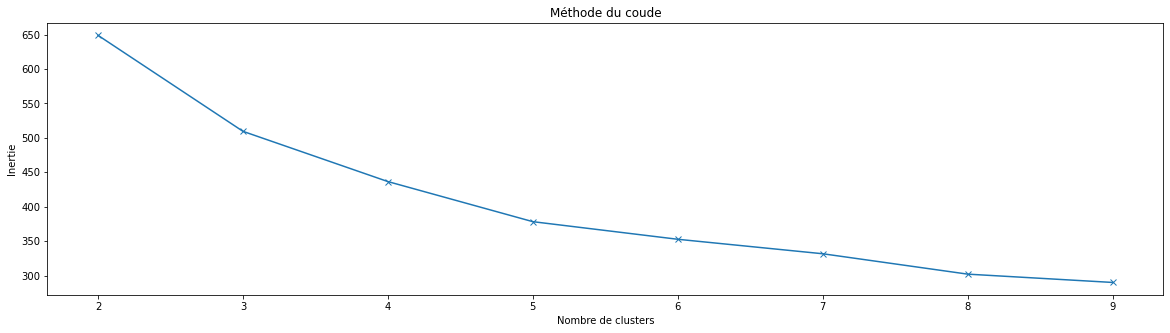

In [5]:

# Tracer la courbe de l'inertie en fonction du nombre de clusters
fig = plt.figure(figsize=(20,5))
plt.plot(range(2, 10), inertias,'x-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()
fig.savefig('courbe_Inertie_Kmeans_1.png',dpi=fig.dpi*10)

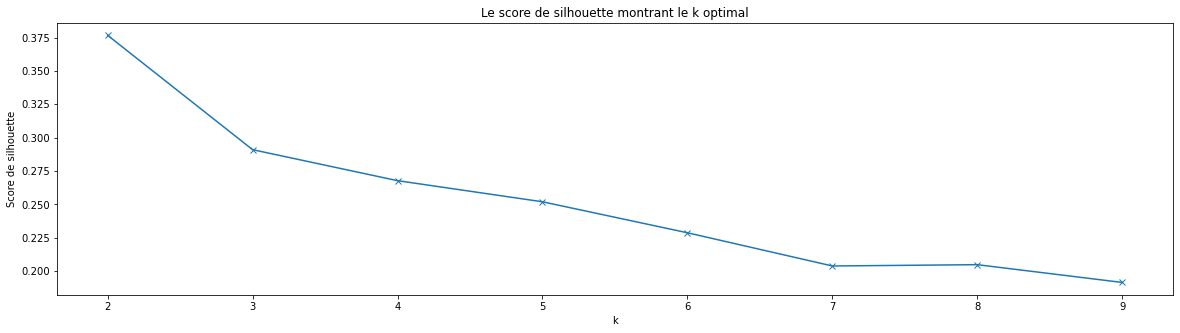

In [6]:
# Graphique du score de silhouette
fig = plt.figure(figsize=(20,5))
# Background color
plt.plot(K, silhouettes, 'x-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()
fig.savefig('score_silhouette_kmeans_1.png',dpi=fig.dpi*10)

#### La methode du coude et la methode du score de silhouette nous préconisent 3 clusters comme choix optimal .

In [7]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 5 pour cet exemple)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_normalized)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
# Ajouter les labels de cluster au DataFrame
data['cluster_label'] = kmeans.labels_
data['cluster_label'] = data['cluster_label'].astype('category')
data

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol,cluster_label
0,Afghanistan,357.31,728905.0,68985.0,21.76,8.015197,530.149831,-2.80,0
1,Afrique du Sud,556.42,1090255.0,160600.0,45.54,4.344302,6723.928582,-0.28,2
2,Albanie,1260.49,1241000.0,383980.0,54.23,-0.268914,4521.752217,0.38,1
3,Algérie,798.71,1220925.0,155855.0,31.18,6.293751,4134.936055,-0.92,0
4,Allemagne,943.24,1299035.0,401135.0,66.54,1.634734,44670.222282,0.59,1
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,627.67,1230050.0,181405.0,36.85,3.973475,42522.377617,0.62,2
168,Équateur,563.62,943525.0,196735.0,53.84,5.380810,6246.404252,-0.07,2
169,États-Unis d'Amérique,990.38,1373130.0,379235.0,71.99,1.937792,59059.596403,0.29,1
170,Éthiopie,361.77,840960.0,37230.0,9.81,8.319450,709.761008,-1.68,0


In [9]:
# Interprétation des groupes
# Afficher les statistiques des clusters
cluster_stats = data.groupby('cluster_label')[data_numeric.columns].mean()
cluster_stats

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
cluster_label,,,,,,,
0,529.836667,9.087781e+05,90425.984848,30.571667,6.932816,2575.920532,-0.690000
1,945.106053,1.242066e+06,376209.342105,65.231316,1.140624,40259.421314,0.721053
2,709.401765,1.062826e+06,229461.544118,56.758824,2.475509,10335.789900,0.099857


In [10]:
#centroids
Kmeanscentroids = kmeans.cluster_centers_

# standardisation  : 
Kmeanscentroids_scaled = scaler.fit_transform(Kmeanscentroids)

# et on utilise l'ACP déjà entrainée : 
Kmeanscentroids_proj = pca.transform(Kmeanscentroids_scaled)

# Création d'un dataframe pour plus de clarté:
Kmeanscentroids_proj = pd.DataFrame(Kmeanscentroids_proj, 
                              columns = ["F1", "F2", "F3", "F4","F5","F6","F7"], 
                              index=["cluster_0", "cluster_1", "cluster_2"])
Kmeanscentroids_proj

,F1,F2,F3,F4,F5,F6,F7
cluster_0,-3.204190,0.005736,0.426131,-0.194584,-0.096958,-0.100353,0.161014
cluster_1,3.115866,0.036662,0.275178,0.190964,0.264588,-0.065129,-0.048996
cluster_2,0.088324,-0.042398,-0.701309,0.003620,-0.167630,0.165482,-0.112017


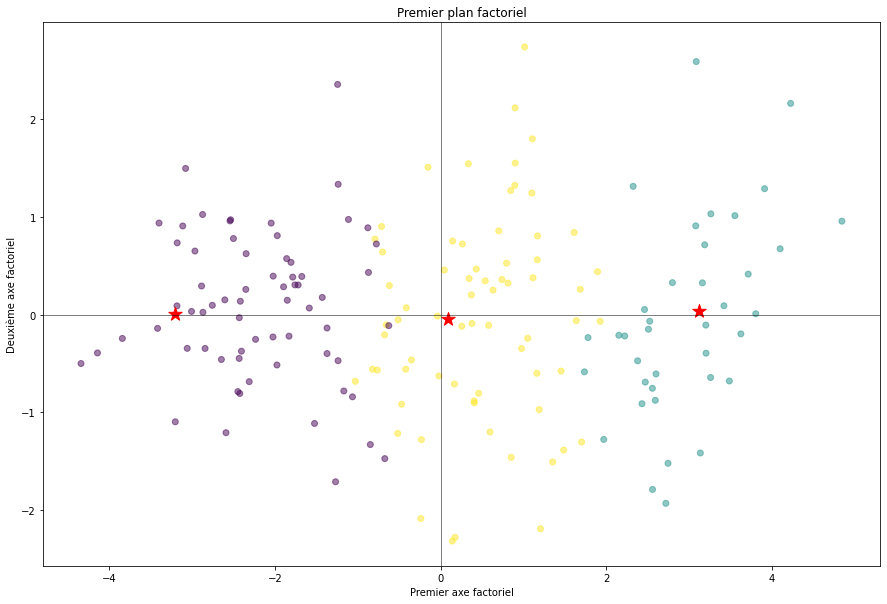

In [11]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5,c=kmeans.labels_)

# On affiche nos centroides, avec une couleur rouge (c="r") et une forme d'étoile (marker="*") : 
ax.scatter(Kmeanscentroids_proj.iloc[:, 0], Kmeanscentroids_proj.iloc[:, 1],  marker="*",s=200, c="r" ,alpha=1)

#Ajouter des étiquettes pour chaque point (type de publication)
#for i, Zone in enumerate(data['Zone']):
#    ax.annotate(Zone, (data_pca[i, 0], data_pca[i, 1]), alpha=1,fontsize=15 )

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxième axe factoriel')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()
fig.savefig('Kmeansprojection.png',dpi=fig.dpi*10)

#### Au vu du cercle de correlation et de la representativité des variables sur les deux premiers axes factoriels, on peut remarquer que les zones du cluster 2 (ici representés en jaune) s'opposent aux  zones du cluster 1 ( ici representés en vert) par la disponibilité alimentaire , la stabilité politique et l'evolution de la population . 
#### En effet , les zones du cluster 2 ont relativement un fort taux d'évolution de la population , avec une disponibilité alimentaire deficitaire accompagnée d'instabilité politique ; tandis que celles du cluster 1 ont relativement un taux de population bas , une bonne disponibilité alimentaire et une bonne stabilité politique .

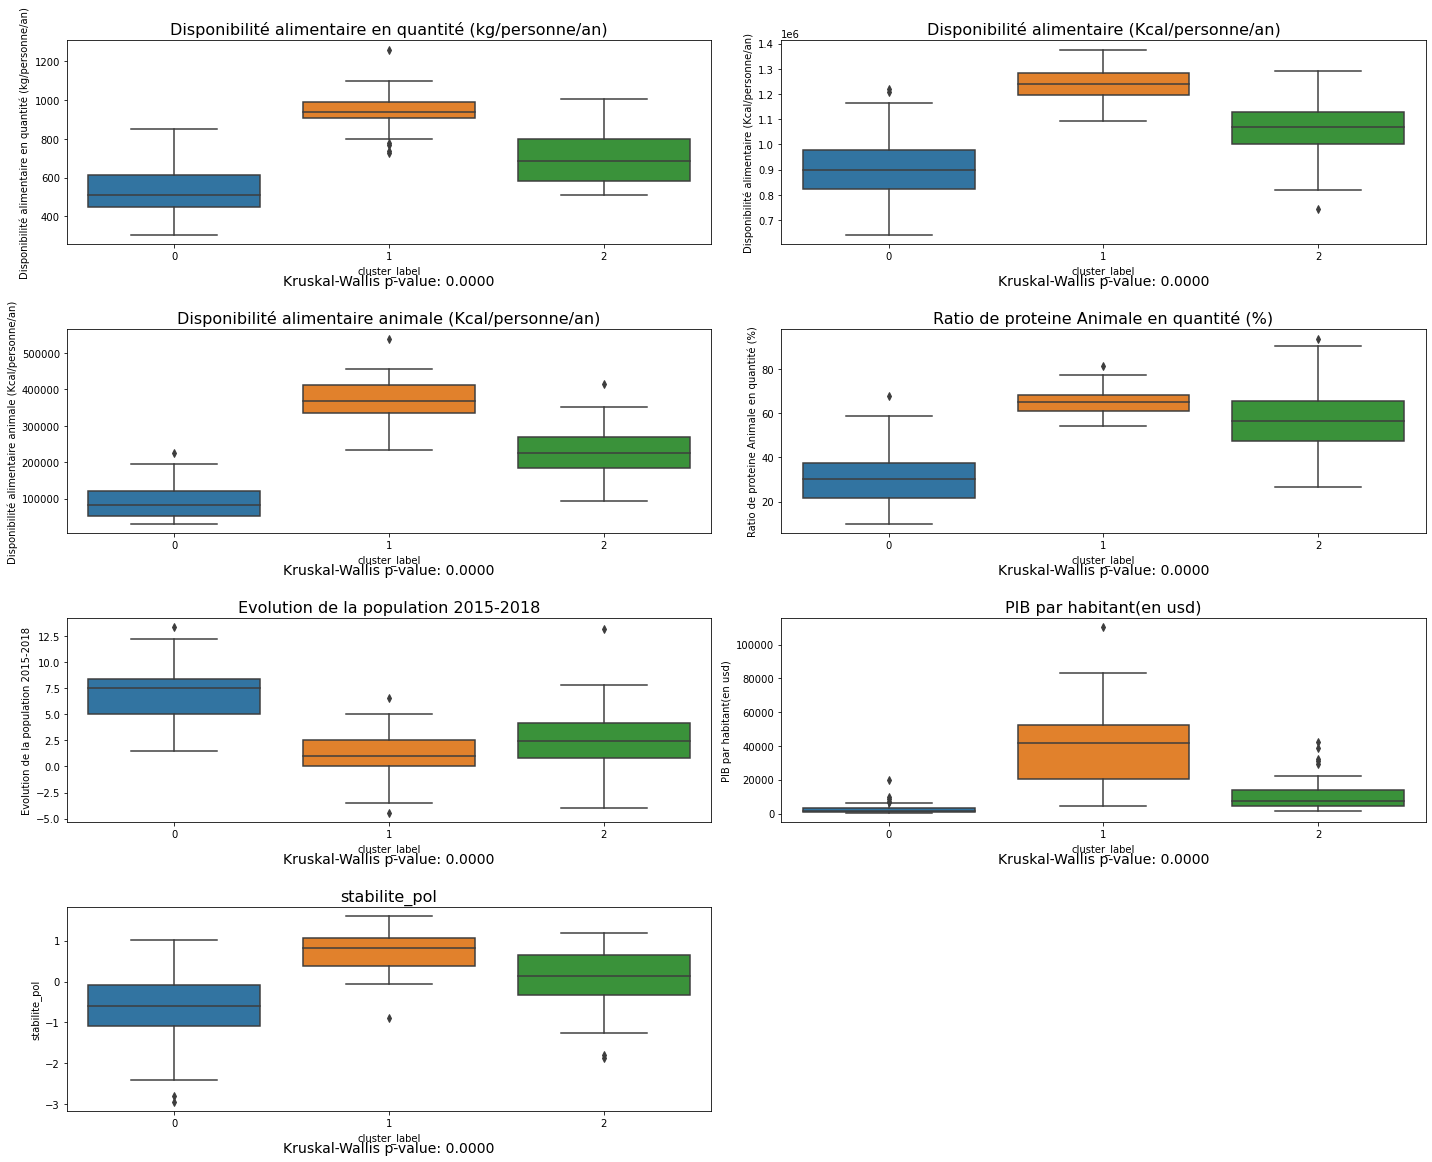

In [12]:
import scipy.stats as stats

# Créer un boxplot pour chaque colonne numérique
num_cols = len(data_numeric.columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

fig = plt.figure(figsize=(20, 4 * num_rows))
for i, column in enumerate(data_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_label', y=column, data=data)
    plt.title(column,fontsize=16)
    
    # Test de Kruskal-Wallis
    stat, p_value = stats.kruskal(*[group[column] for name, group in data.groupby('cluster_label')])
    plt.text(0.5, -0.2, f'Kruskal-Wallis p-value: {p_value:.4f}', size=14, ha='center', transform=plt.gca().transAxes)


plt.tight_layout(h_pad=2.5)
plt.show()
fig.savefig('boxplot_Kmeans_kruskal_wallis.png', dpi=300)


In [13]:
recapKmeans = pd.DataFrame(np.array([['bas','moyen','bas','bas','élévé','bas','moyen'], ['moyen','moyen','moyen','moyen','moyen','bas','moyen'], ['élévé','élévé','élévé','élévé','moyen','élévé','élévé']]),
                   columns=data_numeric.columns,index=data.cluster_label.unique())
recapKmeans

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
0,bas,moyen,bas,bas,élévé,bas,moyen
2,moyen,moyen,moyen,moyen,moyen,bas,moyen
1,élévé,élévé,élévé,élévé,moyen,élévé,élévé


In [14]:

for i in data['cluster_label'].unique() :
    print("-"*20)
    print("Cluster:" ,i)
    print(data.loc[data['cluster_label']==i,'Zone'].tolist())

--------------------
Cluster: 0
['Afghanistan', 'Algérie', 'Angola', 'Arabie saoudite', 'Bangladesh', 'Belize', 'Botswana', 'Burkina Faso', 'Bénin', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kenya', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Pakistan', 'Philippines', 'Rwanda', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Vanuatu', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Éthiopie', 'Îles Salomon']
--------------------
Cluster: 2
['Afrique du Sud', 'Antigua-et-Barbuda', 'Argentine', 'Arméni

<div style="border: 1px solid RGB(136,202,252);" >
<h3 style="margin: auto; padding: 10px;margin-left: 4.5em; text-indent: -4.5em"><a id="32">CAH</a></h3>
</div>

In [15]:


# Calcul de la matrice de similarité/dissimilarité
linkage_matrix = linkage(data_normalized, method='ward', metric='euclidean')#Ward : Cette méthode minimise la somme des carrés des écarts au sein des clusters.
                                                                        #Elle tente de trouver des regroupements compacts et homogènes en minimisant la variance globale.


#### Construction du dendogramme 
**Méthode du saut maximum** : Observez les distances verticales entre les fusions de clusters dans le dendrogramme. **Recherchez les sauts les plus importants** et identifiez le niveau de similarité/dissimilarité correspondant. Le nombre de clusters peut être déterminé par le nombre de sauts significatifs dans le dendrogramme.

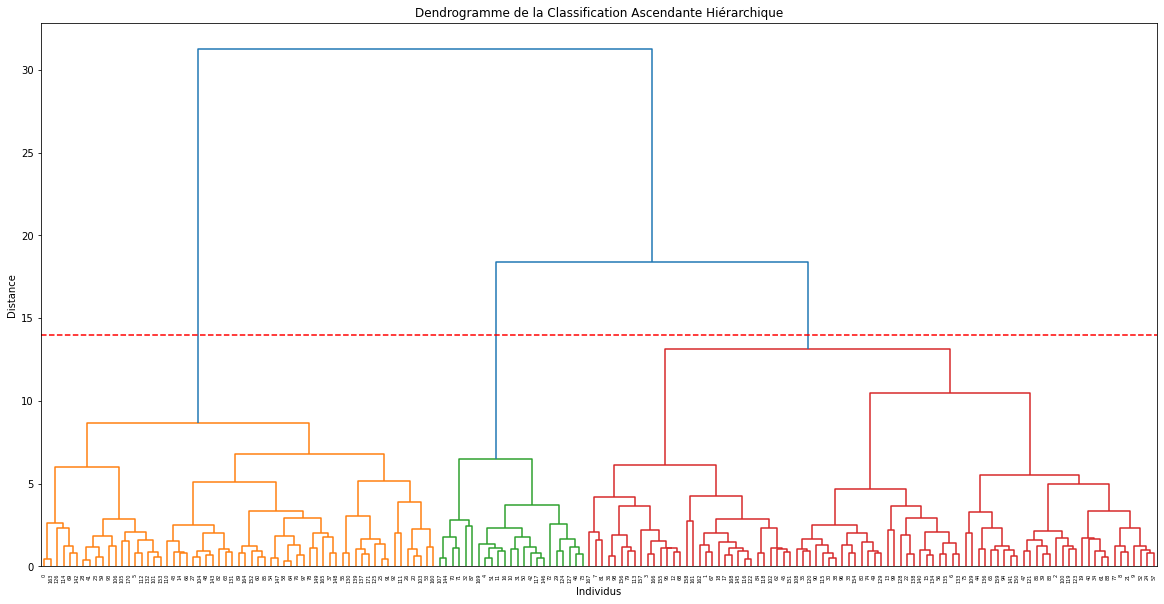

In [16]:
# Affichage du dendrogramme
fig = plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix,color_threshold=14,labels=data.index)

# Tracer une ligne horizontale à l'ordonnée 17
plt.axhline(y=14, color='r', linestyle='--')
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

fig.savefig('Dendrogramme_CAH.png',dpi=fig.dpi*10)

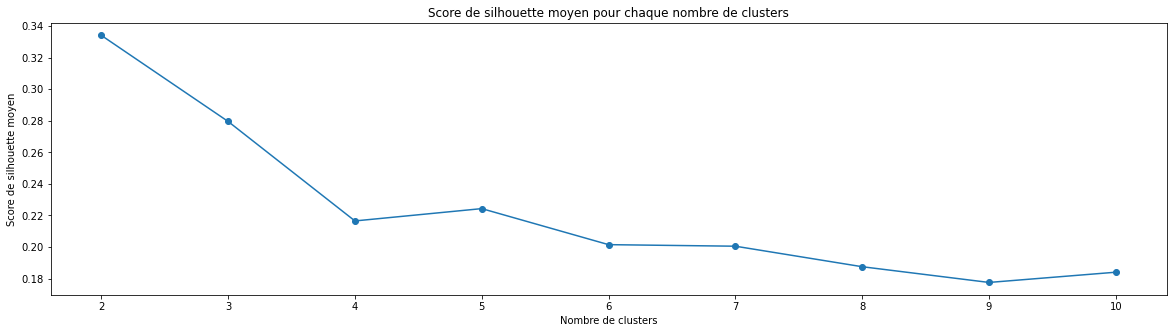

Nombre optimal de clusters : 2


In [17]:
# Effectuer la CAH avec différentes coupes du dendrogramme

max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(data_normalized, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(data_normalized, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
fig = plt.figure(figsize=(20, 5))
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()
fig.savefig('scrore_moyen_silouhette_CAH_1.png',dpi=fig.dpi*10)

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)


Nous allons quand même choisir 3 clusters pour pouvoir le comparer au clustering par Kmeans .

In [18]:

num_clusters = 3

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Ajouter les informations de cluster dans le DataFrame
data['Cluster'] = clusters

# Afficher les statistiques des clusters
cluster_stats = data.groupby('Cluster').mean()
cluster_stats


,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
Cluster,,,,,,,
1,522.988852,8.897982e+05,87629.918033,30.125574,7.159107,2287.472860,-0.597213
2,929.290870,1.257647e+06,390502.391304,67.522609,2.308284,54656.926523,0.753913
3,748.256364,1.093710e+06,244778.125000,56.425455,2.039183,11432.469588,0.087958


In [19]:
cluster_stats.values

array([[ 5.22988852e+02,  8.89798197e+05,  8.76299180e+04,
         3.01255738e+01,  7.15910718e+00,  2.28747286e+03,
        -5.97213115e-01],
       [ 9.29290870e+02,  1.25764717e+06,  3.90502391e+05,
         6.75226087e+01,  2.30828384e+00,  5.46569265e+04,
         7.53913043e-01],
       [ 7.48256364e+02,  1.09371006e+06,  2.44778125e+05,
         5.64254545e+01,  2.03918335e+00,  1.14324696e+04,
         8.79579275e-02]])

In [20]:
#centroids
CAHcentroids = cluster_stats.values

# On utilise bien le scaler déjà entrainé : 
CAHcentroids_scaled = scaler.fit_transform(CAHcentroids)

# et on utilise l'ACP déjà entrainée : 
CAHcentroids_proj = pca.transform(CAHcentroids_scaled)

# Création d'un dataframe pour plus de clarté:
CAHcentroids_proj = pd.DataFrame(CAHcentroids_proj, 
                              columns = ["F1", "F2", "F3", "F4","F5","F6","F7"], 
                              index=["cluster_1", "cluster_2", "cluster_3"])
CAHcentroids_proj

,F1,F2,F3,F4,F5,F6,F7
cluster_1,-3.260523,0.132048,0.409383,-0.204494,-0.066746,-0.086761,0.158565
cluster_2,2.976191,0.262395,0.421029,0.180696,0.107808,-0.033739,-0.064771
cluster_3,0.284332,-0.394443,-0.830412,0.023798,-0.041062,0.120500,-0.093794


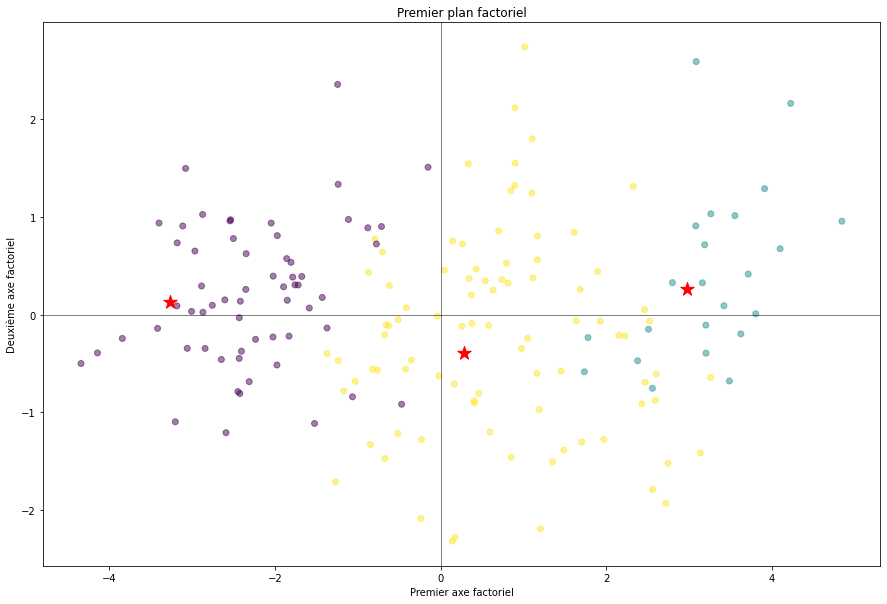

In [21]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5,c=clusters)

#Ajouter les centroids
ax.scatter(CAHcentroids_proj.iloc[:, 0], CAHcentroids_proj.iloc[:, 1],  marker="*",s=200, c="r" ,alpha=1)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxième axe factoriel')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()
fig.savefig('CAHprojection.png',dpi=fig.dpi*10)

#### Au vu du cercle de correlation et de la representativité des variables sur les deux premiers axes factoriels, on peut remarquer que les zones du cluster 2 (ici representés en vert) s'opposent aux  zones du cluster 1 ( ici representés en violet) par la disponibilité alimentaire , la stabilité politique et l'evolution de la population . 
#### En effet , les zones du cluster 2 ont relativement un fort taux d'évolution de la population , avec une disponibilité alimentaire deficitaire accompagnée d'instabilité politique ; tandis que celles du cluster 1 ont relativement un taux de population bas , une bonne disponibilité alimentaire et une bonne stabilité politique .

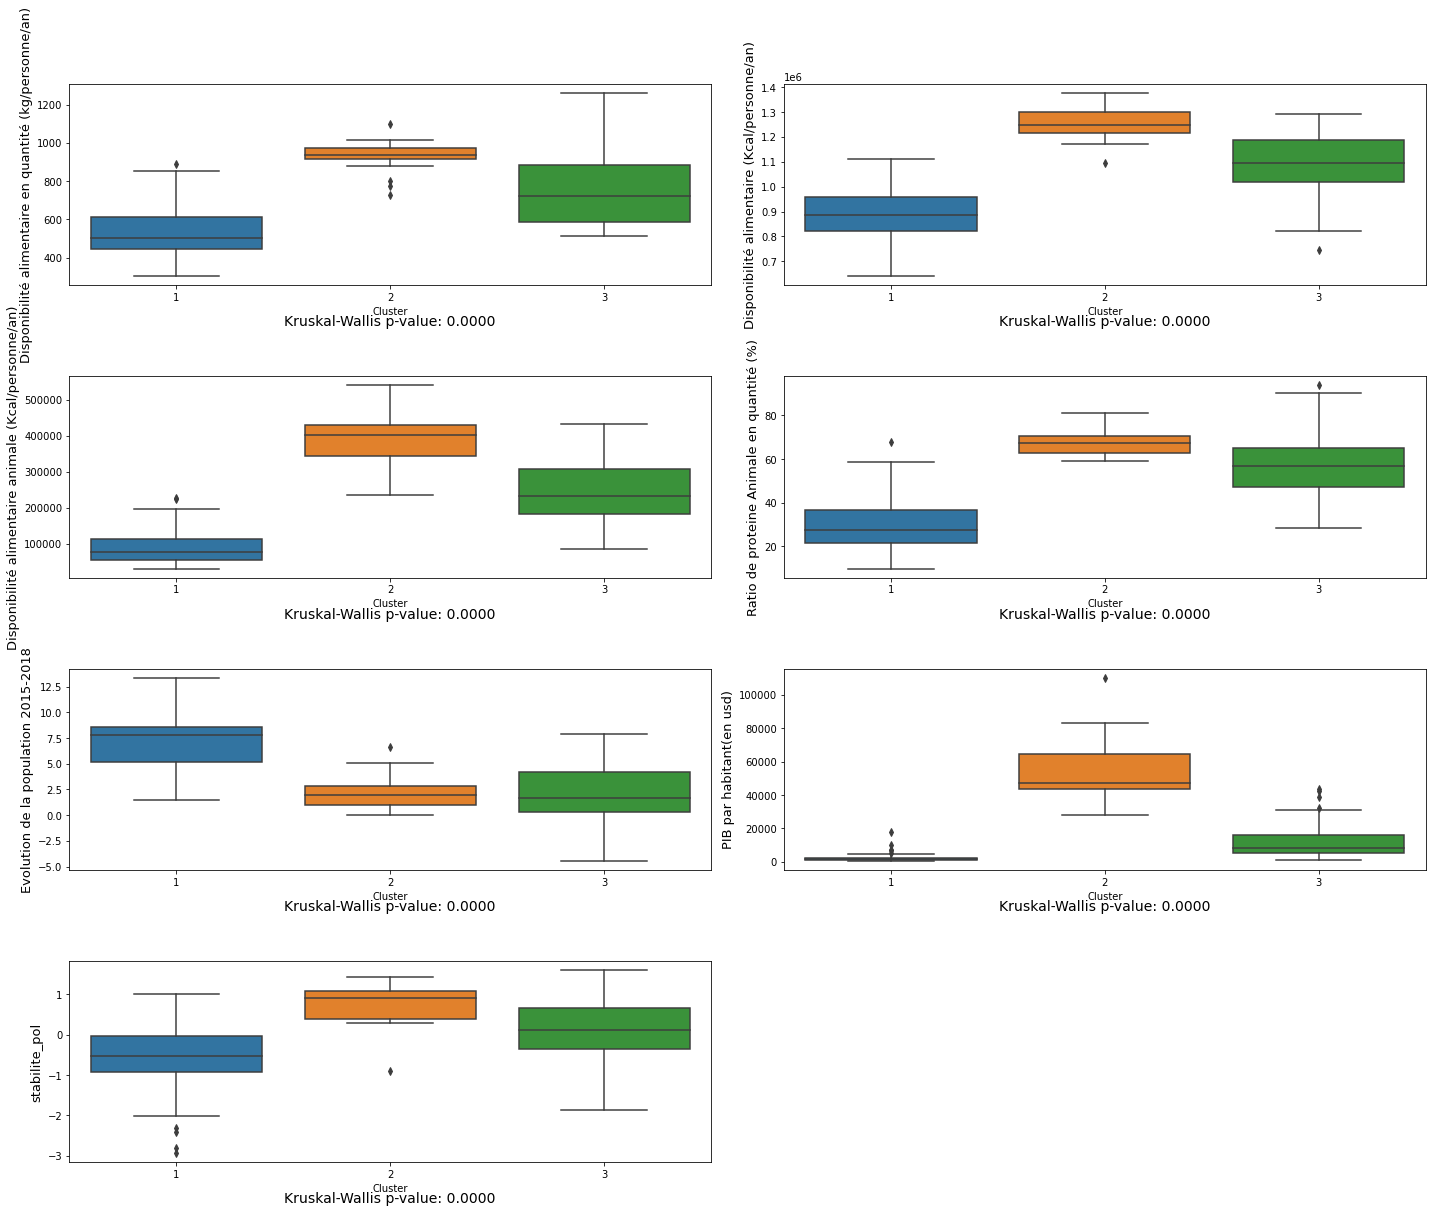

In [22]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(data_numeric.columns) # 

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

fig = plt.figure(figsize=(20, 4 * num_rows))
for i, column in enumerate(data_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Cluster', y=column, data=data)
    #plt.title(column)
    plt.ylabel(column,fontsize="13")
    plt.xlabel('Cluster',fontsize="10")  
    
     # Test de Kruskal-Wallis
    stat, p_value = stats.kruskal(*[group[column] for name, group in data.groupby('Cluster')])
    plt.text(0.5, -0.2, f'Kruskal-Wallis p-value: {p_value:.4f}', size=14, ha='center', transform=plt.gca().transAxes)
    
plt.tight_layout(h_pad=5.0)
plt.show()
fig.savefig('boxplot_clusters_CAH.png',dpi=fig.dpi*10)

In [23]:
recapCAH = pd.DataFrame(np.array([['bas','moyen','bas','bas','élévé','bas','moyen'], ['moyen','moyen','moyen','moyen','moyen','bas','moyen'], ['élévé','élévé','élévé','élévé','moyen','élévé','élévé']]),
                   columns=data_numeric.columns,index=data.Cluster.unique())
recapCAH

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/an),Disponibilité alimentaire animale (Kcal/personne/an),Ratio de proteine Animale en quantité (%),Evolution de la population 2015-2018,PIB par habitant(en usd),stabilite_pol
1,bas,moyen,bas,bas,élévé,bas,moyen
3,moyen,moyen,moyen,moyen,moyen,bas,moyen
2,élévé,élévé,élévé,élévé,moyen,élévé,élévé


In [24]:
# Calculer le score de silhouette
silhouette_avg = silhouette_score(data_normalized, clusters)
print("Score de silhouette :", round(silhouette_avg,3))

Score de silhouette : 0.28


In [25]:

for i in data['Cluster'].unique() :
    print("-"*20)
    print("Cluster:" ,i)
    print(data.loc[data['Cluster'] == i, 'Zone'].tolist())

--------------------
Cluster: 1
['Afghanistan', 'Angola', 'Bangladesh', 'Botswana', 'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Inde', 'Iraq', 'Jordanie', 'Kenya', 'Lesotho', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Oman', 'Ouganda', 'Pakistan', 'Rwanda', 'République centrafricaine', 'République démocratique populaire lao', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Vanuatu', 'Yémen', 'Zambie', 'Zimbabwe', 'Éthiopie', 'Îles Salomon']
--------------------
Cluster: 3
['Afrique du Sud', 'Albanie', 'Algérie', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie', 'Azerbaïdjan'

[RETOUR AU SOMMAIRE](#200)